# Домашнее задание к уроку 02.
_Е. Драгомирова_

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def calc_mse(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    return mse

#### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [4]:
def gd_model_l2 (X, y, eta=1e-2, iterations=3001, eta_corr=150, lambda_=1e-8, verbose=False):
    W = np.array([1, 0.5])
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        mse = calc_mse(y, y_pred)
        
        W -= eta * (2 / len(y) * np.dot(X.T, y_pred - y) + lambda_ * W)
        
        if i % eta_corr == 0:
            eta /= 1.1
        
        if verbose:
            if i % 500 == 0:
                print(f'Iteration #{i}: Weights = {W}, MSE = {round(mse,4)}')
    return W

In [5]:
gd_model_l2(X, y, eta=1e-2, iterations=3001, eta_corr=150, lambda_=1e-8, verbose=True)

Iteration #0: Weights = [2.08 4.27], MSE = 3047.75
Iteration #500: Weights = [44.05954184  3.99437099], MSE = 44.4485
Iteration #1000: Weights = [44.99642744  3.82448124], MSE = 43.9708
Iteration #1500: Weights = [45.05341088  3.81414817], MSE = 43.9688
Iteration #2000: Weights = [45.0603327  3.812893 ], MSE = 43.9688
Iteration #2500: Weights = [45.06173891  3.81263801], MSE = 43.9688
Iteration #3000: Weights = [45.06214519  3.81256434], MSE = 43.9688


array([45.06214519,  3.81256434])

In [6]:
lambda_list = np.array([1e-8, 1e-4, 1e-2, 1, 5, 10, 20])
w_list = []

In [7]:
for lmbd in lambda_list:
    w = gd_model_l2(X, y, eta=1e-2, iterations=3001, eta_corr=150, lambda_=lmbd)
    w_list.append(w)

w_list = np.array(w_list)

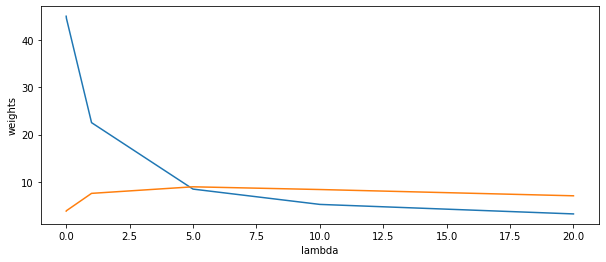

In [8]:
plt.figure(figsize=(10, 4))

for i in range(len(w_list[0])):
    plt.plot(lambda_list, w_list[:, i])

plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()

#### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [9]:
def gd_model_l1 (X, y, eta=1e-2, iterations=3001, eta_corr=150, lambda_=1e-8, verbose=False):
    W = np.array([1, 0.5])
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        mse = calc_mse(y, y_pred)
        
        W -= eta * (2 / len(y) * np.dot(X.T, y_pred - y) + lambda_ * np.sign(W))
        
        if i % eta_corr == 0:
            eta /= 1.1
        
        if verbose:
            if i % 500 == 0:
                print(f'Iteration #{i}: Weights = {W}, MSE = {round(mse,4)}')
    return W

In [10]:
lambda_list = np.array([1e-8, 1e-4, 1e-2, 1, 5, 10, 20])
w_list = []

In [11]:
for lmbd in lambda_list:
    w = gd_model_l1(X, y, eta=1e-2, iterations=3001, eta_corr=150, lambda_=lmbd)
    w_list.append(w)

w_list = np.array(w_list)

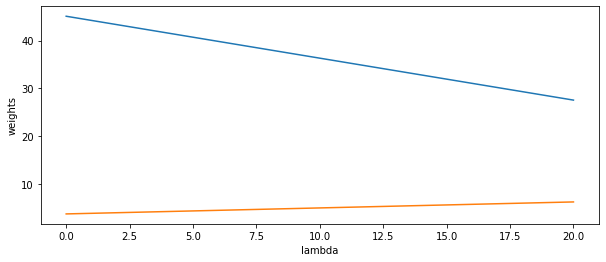

In [12]:
plt.figure(figsize=(10, 4))

for i in range(len(w_list[0])):
    plt.plot(lambda_list, w_list[:, i])

plt.xlabel('lambda')
plt.ylabel('weights')
plt.show()

#### *3. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, но бессмысленно.

#### *4. Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [13]:
X, Y, coef = datasets.make_regression(n_samples=2000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10

In [171]:
def gradient_descent(X, y, eta=1e-2, iterations=5001, eta_corr=100, verbose=False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    gd_mse = []
    
    for i in range(iterations):
        y_pred = np.dot(X, W)
        mse = calc_mse(y, y_pred)
        gd_mse.append([i, mse, 4])
        
        W -= eta * (2 / n * np.dot(X.T, y_pred - y))
        
        if i % eta_corr == 0:
            eta /= 1.1
        
        if verbose:
            if i % 100 == 0:
                print(f'Iteration #{i}: Weights = {W}, MSE = {round(mse,6)}')
        
    gd_mse = np.array(gd_mse)
    
    return gd_mse

In [151]:
def stohastic_gradient_descent(X, y, eta=1e-2, iterations=5001, eta_corr=100, batch_size=5, verbose=False):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    sgd_mse = []
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    # print(f'amount of batches is {n_batch}')
    
    for i in range(iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]
            
            y_pred_tmp = np.dot(X_tmp, W)
            mse = calc_mse(y_tmp, y_pred_tmp)
            sgd_mse.append([i, mse])
        
            W -= eta * (2/len(y_tmp) * np.dot(X_tmp.T, y_pred_tmp - y_tmp))
        
        if i % eta_corr == 0:
            eta /= 1.1
        
        if verbose:
            if i % 100 == 0:
                print(f'Iteration #{i}: Weights = {W}, MSE = {round(mse,6)}')
    
    sgd_mse = np.array(sgd_mse)
        
    return sgd_mse

In [172]:
gd_mse = gradient_descent(X, Y, eta=1e-2, iterations=1001, eta_corr=100, verbose=True)

Iteration #0: Weights = [15.35210535  1.24996757], MSE = 6902.385747
Iteration #100: Weights = [ 7.49802861 29.60550293], MSE = 53.252307
Iteration #200: Weights = [ 7.50124648 33.86661486], MSE = 25.497932
Iteration #300: Weights = [ 7.50181961 34.62333602], MSE = 24.567571
Iteration #400: Weights = [ 7.50193799 34.77964076], MSE = 24.525183
Iteration #500: Weights = [ 7.50196603 34.81666397], MSE = 24.522633
Iteration #600: Weights = [ 7.50197355 34.82659225], MSE = 24.522436
Iteration #700: Weights = [ 7.50197581 34.82957171], MSE = 24.522417
Iteration #800: Weights = [ 7.50197656 34.83056189], MSE = 24.522415
Iteration #900: Weights = [ 7.50197683 34.83092286], MSE = 24.522414
Iteration #1000: Weights = [ 7.50197694 34.83106597], MSE = 24.522414


In [164]:
sgd_mse = stohastic_gradient_descent(X, Y, eta=1e-2, iterations=1001, eta_corr=100, batch_size=5, verbose=True)

Iteration #0: Weights = [ 9.89385945 35.76705386], MSE = 264.214572
Iteration #100: Weights = [ 9.71054712 35.23053883], MSE = 176.980324
Iteration #200: Weights = [ 9.50717066 34.82324914], MSE = 116.211477
Iteration #300: Weights = [ 9.29299613 34.65337875], MSE = 75.235426
Iteration #400: Weights = [ 9.09915046 34.58964912], MSE = 50.48169
Iteration #500: Weights = [ 8.92910408 34.57626229], MSE = 35.967549
Iteration #600: Weights = [ 8.77992688 34.58679131], MSE = 27.623737
Iteration #700: Weights = [ 8.64759594 34.60763554], MSE = 23.009118
Iteration #800: Weights = [ 8.52869213 34.63205106], MSE = 20.702828
Iteration #900: Weights = [ 8.42079389 34.65677528], MSE = 19.867371
Iteration #1000: Weights = [ 8.32233195 34.68019764], MSE = 19.988228


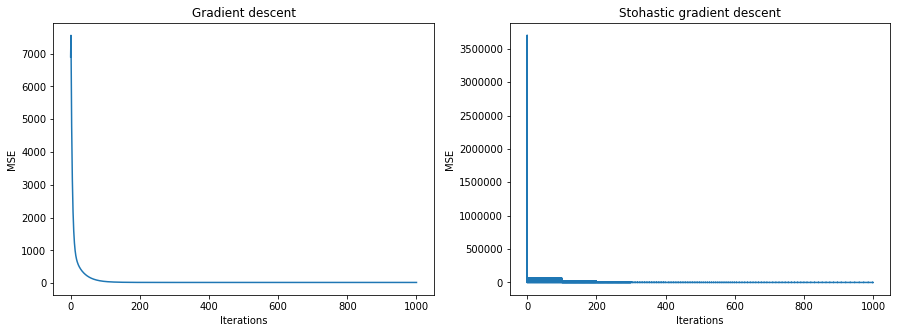

In [209]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.7)

ax1.plot(gd_mse[:, 0], gd_mse[:, 1])
ax1.set_xlabel('Iterations')
ax1.set_ylabel('MSE')
ax1.set_title('Gradient descent')

ax2.plot(sgd_mse[:, 0], sgd_mse[:, 1])
ax2.set_xlabel('Iterations')
ax2.set_ylabel('MSE')
ax2.set_title('Stohastic gradient descent')

plt.show()

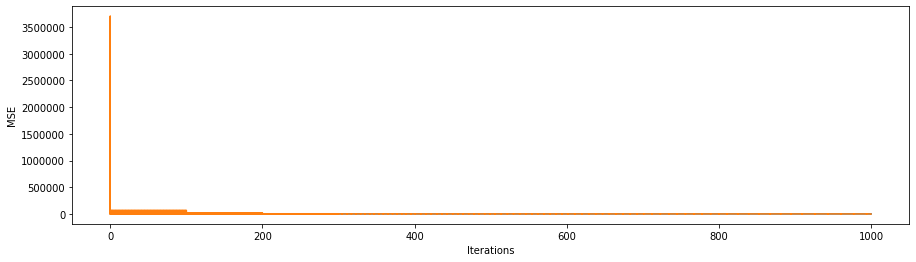

In [207]:
plt.figure(figsize=(15, 4))

plt.plot(gd_mse[:, 0], gd_mse[:, 1])
plt.plot(sgd_mse[:, 0], sgd_mse[:, 1])

plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()